# Preprocess Dataset

In this notebook we exemplify the ligh curve preprocessing described in [Link to paper in arXiv]().
For that we use the SN Ia, SN Ibc and SN II of the PLAsTiCC dataset  ([The  PLAsTiCC  team  et  al.](https://arxiv.org/abs/1810.00001); [Kessler et al. 2019](https://iopscience.iop.org/article/10.1088/1538-3873/ab26f1)).

#### Index<a name="index"></a>
1. [Import Packages](#imports)
2. [Load the Original Dataset](#loadData)
3. [Preprocess Light Curves](#preprocess)
4. [Save Processed PlasticcData](#saveData)
5. [Light Curve Comparison](#comparison)

## 1. Import Packages<a name="imports"></a>

In [1]:
import os
import pickle
import sys

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from snmachine import sndata
from utils.plasticc_pipeline import get_directories, load_dataset

No module named 'pymultinest'

                PyMultinest not found. If you would like to use, please install
                Mulitnest with 'sh install/multinest_install.sh; source
                install/setup.sh'
                


In [4]:
%config Completer.use_jedi = False  # enable autocomplete

#### Aestetic settings

In [5]:
%matplotlib inline

sns.set(font_scale=1.3, style="ticks")

## 2. Load Original Dataset<a name="loadData"></a>

First, **write** the path to the dataset folder `folder_path`.

In [6]:
folder_path = '../snmachine/example_data'

Then, **write** in `data_file_name` the name of the file where your dataset is saved.

In this notebook we use the dataset created in [1_load_data](1_load_data.ipynb).

In [7]:
data_file_name = 'example_dataset.pckl'

Load the dataset.

In [8]:
data_path = os.path.join(folder_path, data_file_name)
dataset = load_dataset(data_path)

Opening from binary pickle
Dataset loaded from pickle file as: <snmachine.sndata.PlasticcData object at 0x7f21ac8bb150>


Save the data of one event to later compare on the Section [Light curve transformation](#transformation). **Choose** the event by modifying `obj_show`.

In [9]:
obj_show = '7033'
obs_before = dataset.data[obj_show].to_pandas()

## 3. Preprocess Light Curves<a name="preprocess"></a>

**Write** the maximum duration of the gap to allowed in the light curves, `max_gap_length`.

In [10]:
max_gap_length = 50

To remove all the gaps longer than `max_gap_length`, the `remove_gaps` function must be called a few times; it only removes the first gap longer than `max_gap_length`.

To introduce uniformity in the dataset, the resulting light curves are translated so their first observation is at time zero.

In [11]:
dataset.remove_gaps(max_gap_length*2, verbose=True)
dataset.remove_gaps(max_gap_length*2, verbose=True)
dataset.remove_gaps(max_gap_length, verbose=True)
dataset.remove_gaps(max_gap_length, verbose=True)
dataset.remove_gaps(max_gap_length, verbose=True)

The longest event is 74994691 and its length is 1090.99 days.
The longest event is 79641012 and its length is 879.68 days.
The longest event is 79333412 and its length is 629.56 days.
The longest event is 79333412 and its length is 271.56 days.
The longest event is 79333412 and its length is 271.56 days.


In [12]:
print(f'The longest processed light curve has {dataset.get_max_length():.2f} days.')

The longest processed light curve has 271.56 days.


## 4. Save Processed PlasticcData<a name="saveData"></a>

Now, **chose** a path to save the PlasticcData instance created (`folder_path_to_save`) and the name of the file (`file_name`).

In [13]:
folder_path_to_save = folder_path
file_name = data_file_name[:-5]+'_gapless50.pckl'
file_name

'example_dataset_gapless50.pckl'

In [14]:
with open(os.path.join(folder_path_to_save, file_name), 'wb') as f:
    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)

[Go back to top.](#index)

## 5. Light Curve Comparison<a name="comparison"></a>

Here we show the difference between one original light curve and the transformed one.

In [15]:
obs_after = dataset.data[obj_show]

Text(0.5, 1.0, 'Before')

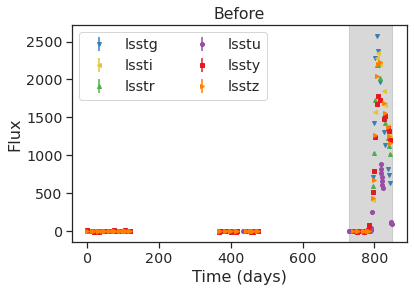

In [16]:
sndata.plot_lc(obs_before)
plt.axvspan(xmin=729, xmax=849, color='gray', alpha=.3)
plt.title('Before')

Text(0.5, 1.0, 'After')

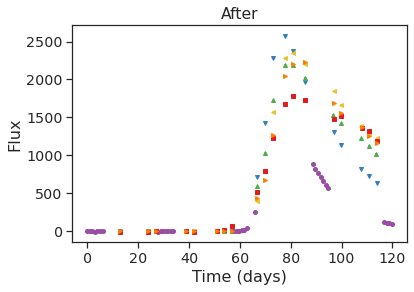

In [17]:
sndata.plot_lc(obs_after, False)
plt.title('After')

[Go back to top.](#index)

*Previous notebook:* [1_load_data](1_load_data.ipynb)

**Next notebook:** [3_model_lightcurves](3_model_lightcurves.ipynb)